# BIKE ASSIGNEMENT

### This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

- which variables are important and affects the target variable.
- the target variable is 'cnt'.

Database Dictionary
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Important Libraries

In [162]:
# libraries for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [163]:
#librarires for linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Reading dataset

In [164]:
bike_data=pd.read_csv(r"C:\Users\Admin\Downloads\day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 1. Understanding data

In [165]:
bike_data.shape

(730, 16)

In [166]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [167]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There are no Null Values in the data.

## Step taken

-As we can see the columns casual and registered are already included in the column 'cnt', so its better to drop casul and registered column.

-dropping date column as there are columns which already has month,weekday, year & holidays in the data.

In [168]:
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [169]:
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


# 2. Visualising Data

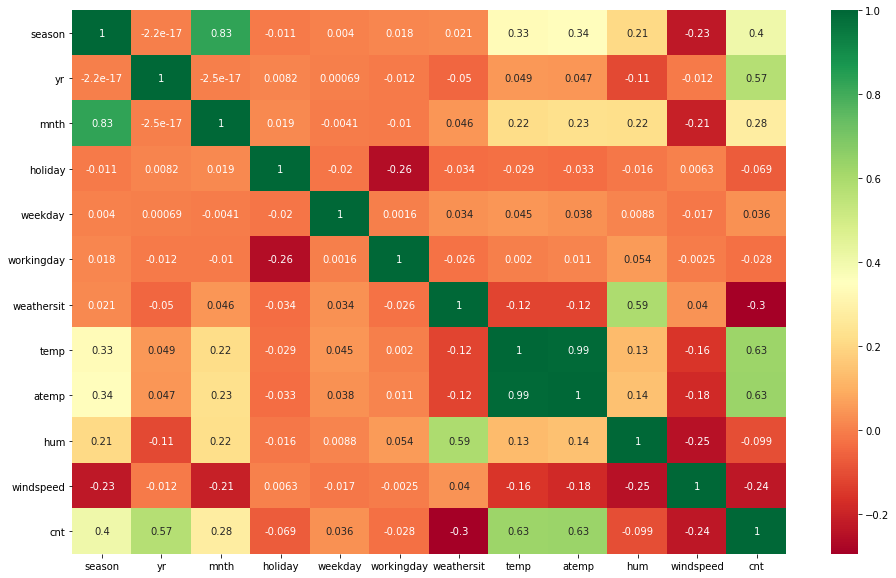

In [170]:
# visualisisng numeric data

plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), cmap="RdYlGn", annot = True)
plt.show()

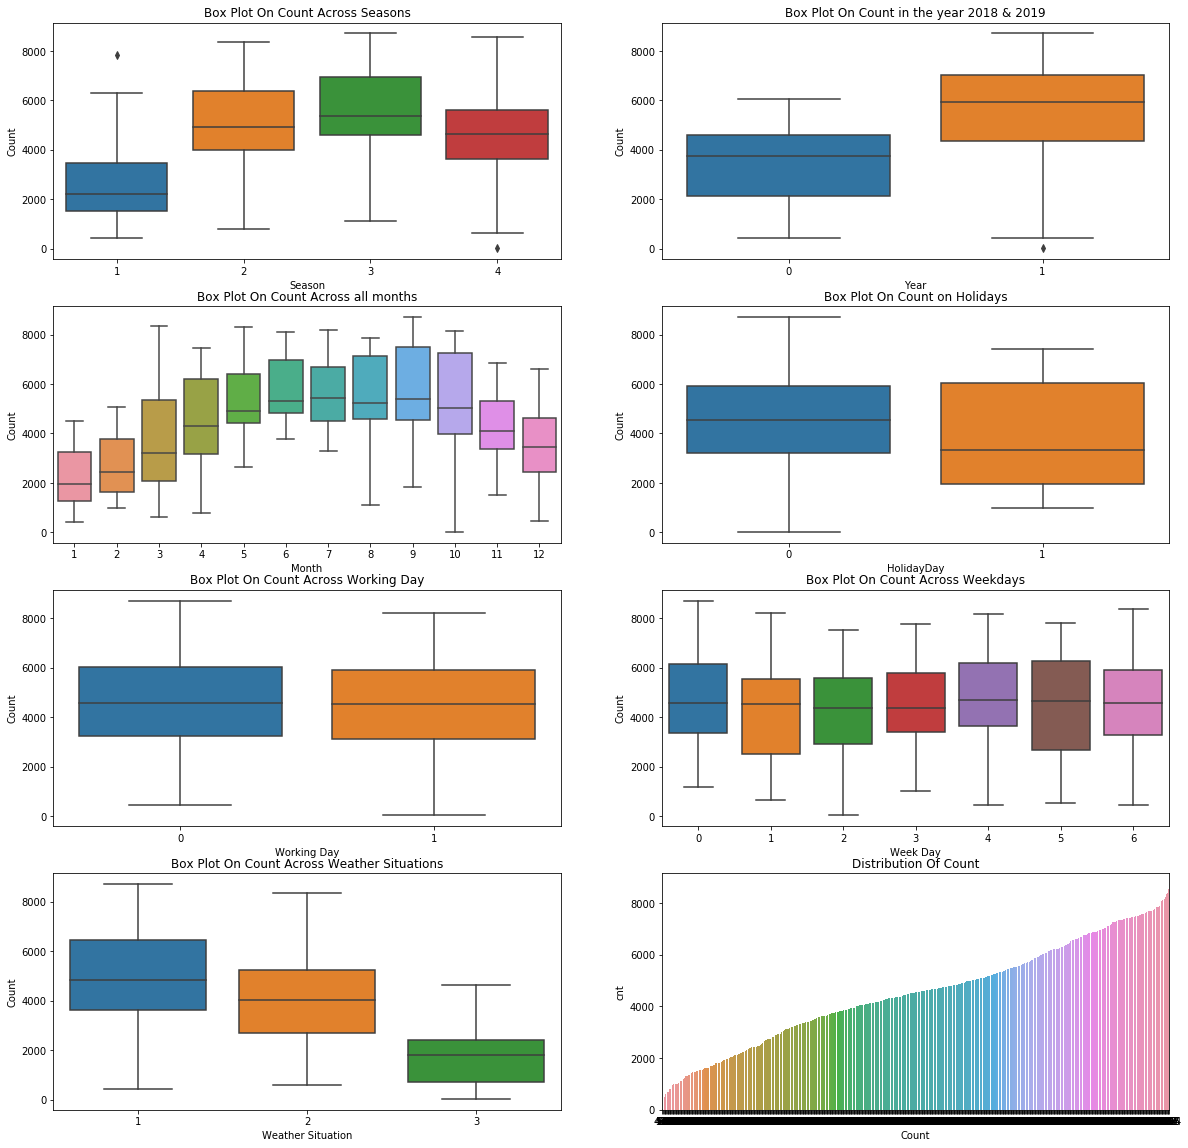

In [171]:
# visualising categorical data

fig, axes = plt.subplots(4,2)
fig.set_size_inches(20, 20)
sns.boxplot(data=bike_data,y="cnt",x="season",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="cnt",x="yr",orient="v",ax=axes[0][1])
sns.boxplot(data=bike_data,y="cnt",x="mnth",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_data,y="cnt",x="holiday",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_data,y="cnt",x="workingday",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_data,y="cnt",x="weekday",orient="v",ax=axes[2][1])
sns.boxplot(data=bike_data,y="cnt",x="weathersit",orient="v",ax=axes[3][0])
sns.barplot(data=bike_data,y="cnt",x="cnt",orient="v",ax=axes[3][1])

axes[0][0].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Seasons")
axes[0][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count in the year 2018 & 2019")
axes[1][0].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across all months")
axes[1][1].set(xlabel='HolidayDay', ylabel='Count',title="Box Plot On Count on Holidays")
axes[2][0].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][1].set(xlabel='Week Day', ylabel='Count',title="Box Plot On Count Across Weekdays")
axes[3][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[3][1].set(xlabel='Count',title="Distribution Of Count")
plt.show()

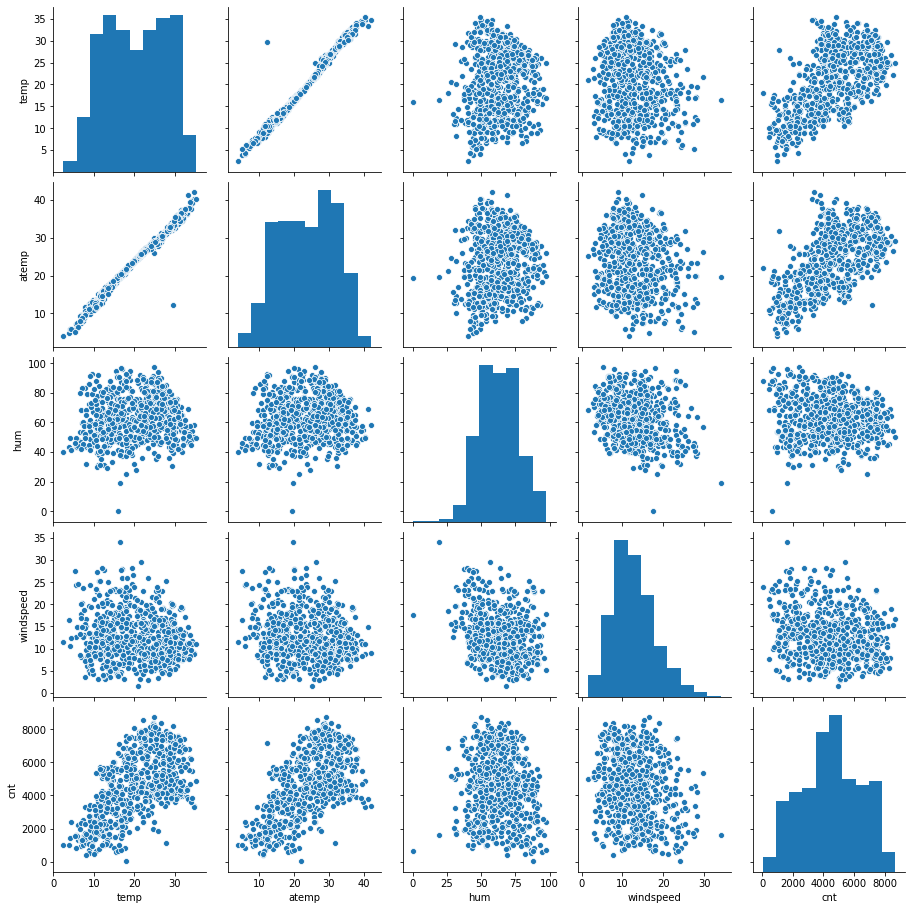

In [172]:
# visualisising numeric data

bike_num = bike_data[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

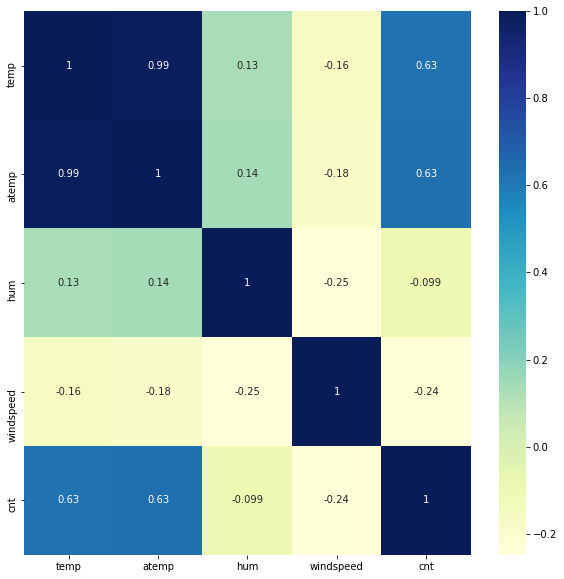

In [173]:
plt.figure(figsize = (10,10))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="YlGnBu",)

In [174]:
# replcaing the season values to spring summer fall and winter

bike_data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike_data.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [175]:
# replacing numerical values of month to respective names.

bike_data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_data.mnth.value_counts(normalize=True)

Jan    0.084932
Jul    0.084932
Dec    0.084932
Aug    0.084932
Mar    0.084932
May    0.084932
Oct    0.084932
Sep    0.082192
Apr    0.082192
Nov    0.082192
Jun    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [176]:
#replacing the weathersit to to respective names.

bike_data.weathersit.replace((1,2,3,4), ('Clear','Mist','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike_data.weathersit.value_counts(normalize=True)

Clear             0.634247
Mist              0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [177]:
# replacing the the numeric values of weekday into  respective names.

bike_data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike_data.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Sunday       0.142466
Saturday     0.142466
Friday       0.142466
Wednesday    0.142466
Thursday     0.142466
Name: weekday, dtype: float64

# 3. Data preparation

## Dummy variable creation

In [178]:
# dummy variable for season
season = pd.get_dummies(bike_data['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [179]:
# dummy variable for weather
weather = pd.get_dummies(bike_data['weathersit'], drop_first = True)
weather.head()

,Light_rainsnow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [180]:
# dummy variable for month
month = pd.get_dummies(bike_data['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [181]:
# dummy variable for weekday
weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


## Merging dataframes

In [182]:
bike_data2 = pd.concat([bike_data,season,month,weather,weekday], axis = 1)
bike_data2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [183]:
bike_data2.shape

(730, 34)

In [184]:
bike_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Spring          730 non-null    uint8  
 13  Summer          730 non-null    uint8  
 14  Winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [185]:
# removing some unnecesary columns
bike_data2.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_data2.shape

(730, 30)

# 4. Splitting the data into train and test dataset

In [186]:
bike_train, bike_test = train_test_split(bike_data2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [187]:
bike_train.shape

(510, 30)

In [188]:
bike_test.shape

(219, 30)

In [189]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rescaling train dataframe

In [191]:
# applying scaler on  numeric values
scaler = MinMaxScaler()
num = ['temp','atemp','hum','windspeed','cnt']
bike_train[num] = scaler.fit_transform(bike_train[num])

In [192]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,1,0,0,0


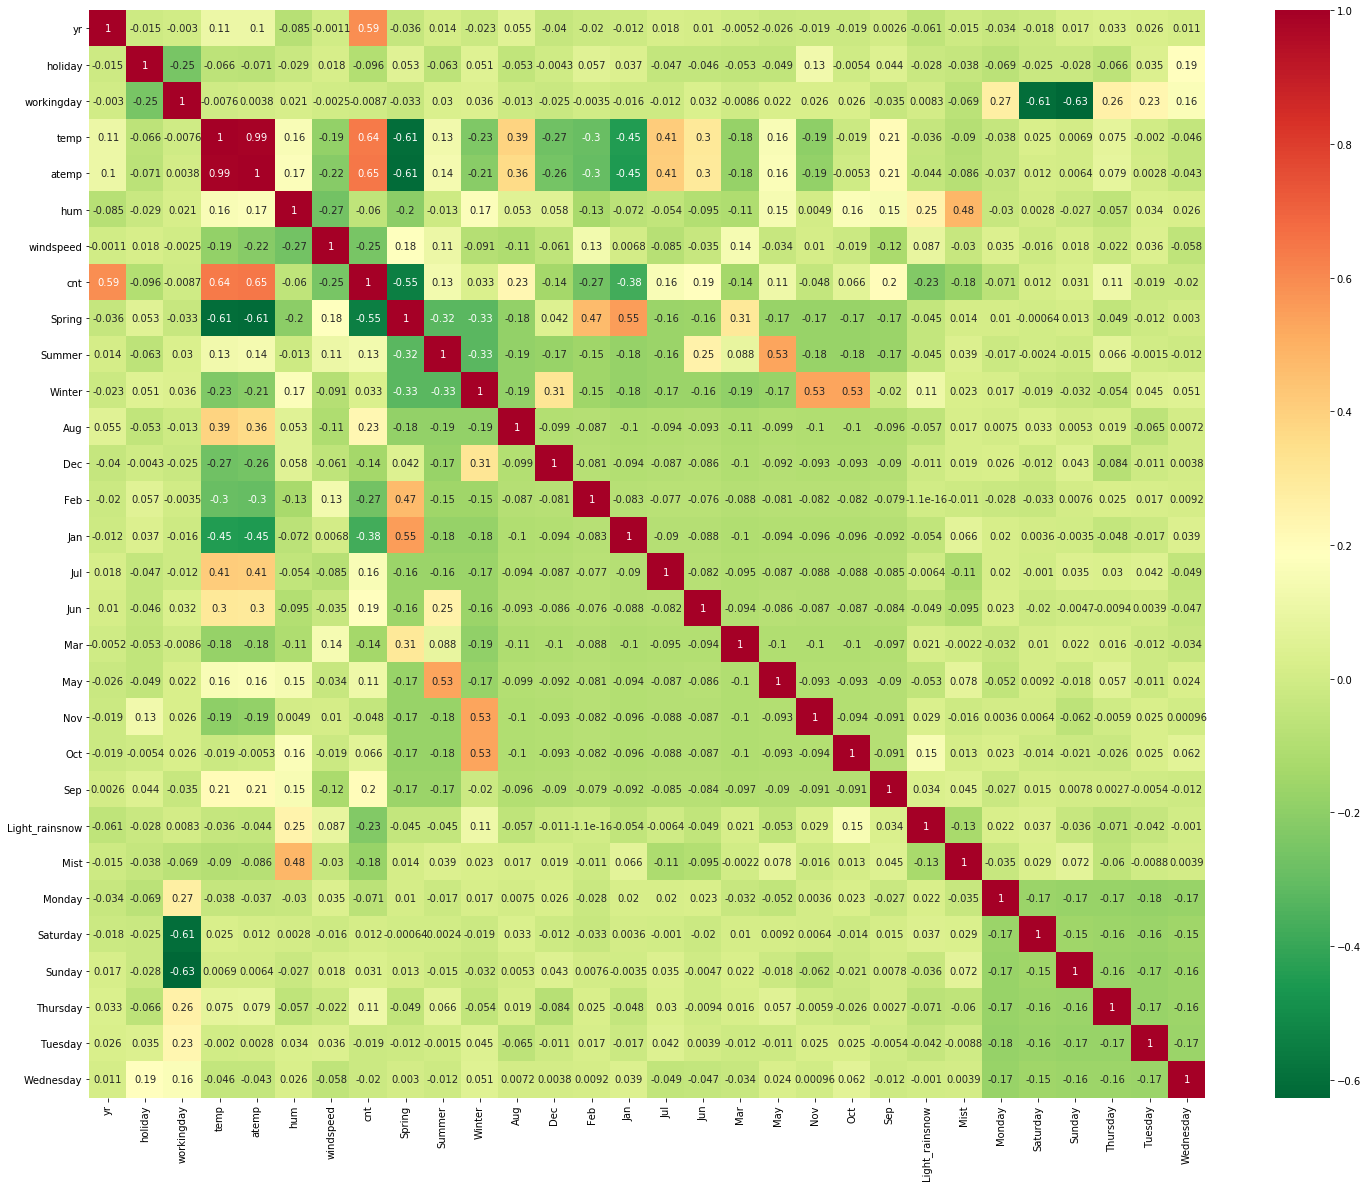

In [193]:
#checking correlation

plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn_r",)
plt.show()

### temp and atemp are highly correlated have to drop it anyway.

# 5. Building the linear model

### Dividing into X and Y sets for the model building

In [194]:
y_train = bike_train.pop('cnt')
X_train = bike_train

#### using recursive feature elimination (RFE)

In [195]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [197]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_rainsnow', 'Mist'],
      dtype='object')

In [198]:
# checking which columns have been eliminated
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [199]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### model development using statsmodel

In [200]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [201]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


### Model 1

In [202]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        13:33:29   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

### We generally want a VIF that is less than 5. Also need to check the p-value.

- High P-value and High VIF definitely needs to be dropped.
- High P-value and Low VIF also needs to be dropped.

#### As we can clearly see VIF of humidity is highest so need to drop it.

In [203]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist,1.56


### Model 2

In [204]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.57e-186
Time:                        13:33:29   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

#### Have to drop summer because it has high p-value

In [205]:
X_train_new = X_train_new.drop(['Summer'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,Winter,2.54
4,Spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist,1.53
6,Dec,1.46
8,Jul,1.36


### Model 3

In [206]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.08e-186
Time:                        13:33:30   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.

#### Have to drop November because it has high p-value

In [207]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,Spring,2.36
0,yr,2.06
5,Winter,1.64
7,Jan,1.64
11,Mist,1.53
8,Jul,1.36
6,Dec,1.29
9,Sep,1.20


### Model 4

In [208]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.02e-186
Time:                        13:33:30   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.

#### Have to drop December because it has high p-value

In [209]:
X_train_new = X_train_new.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,Spring,2.25
0,yr,2.06
6,Jan,1.60
10,Mist,1.53
5,Winter,1.40
7,Jul,1.36
8,Sep,1.20
9,Light_rainsnow,1.08


### Model 5

In [210]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.13e-186
Time:                        13:33:30   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2657      0.025     10.

#### Have to drop December because it has high p-value

In [211]:
X_train_new = X_train_new.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,Spring,1.65
9,Mist,1.51
5,Winter,1.40
6,Jul,1.35
7,Sep,1.20
8,Light_rainsnow,1.08
1,holiday,1.04


### Model 6

In [212]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.16e-186
Time:                        13:33:30   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.

In [213]:
# Checking the parameters obtained
lr6.params

const             0.251899
yr                0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
Spring           -0.110795
Winter            0.047278
Jul              -0.072719
Sep               0.057705
Light_rainsnow   -0.286408
Mist             -0.081133
dtype: float64

## 7: Residual Analysis of the train data

In [214]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred

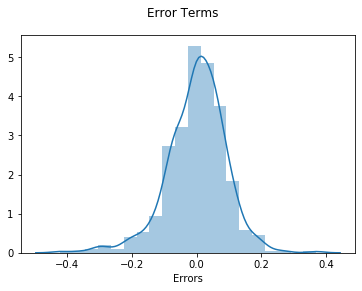

In [215]:
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

## 8: Model prediction and Evaluation

In [216]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


### Dividing x_test and y_test

In [217]:
y_test = bike_test.pop('cnt')
X_test = bike_test


In [219]:
#selecting variables that were part of the new variables.

col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   windspeed       219 non-null    float64
 5   Spring          219 non-null    uint8  
 6   Winter          219 non-null    uint8  
 7   Jul             219 non-null    uint8  
 8   Sep             219 non-null    uint8  
 9   Light_rainsnow  219 non-null    uint8  
 10  Mist            219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [221]:
y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

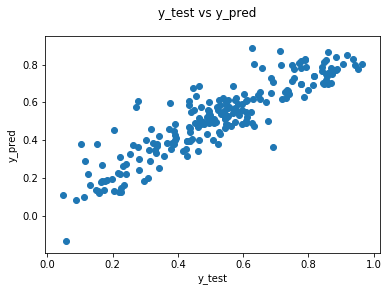

In [222]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

### R square calculaton for bike_test dataframe

In [223]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.807

## The R2 of train dataset is 0.833 and that of test dataset is 0.807

## Model validation

### This is done by checking the following: 

-Linear Relationship

-Homoscedasticity

-Absence of Multicollinearity

-Independence of residuals

-Normality of Errors

### Liner Relationship

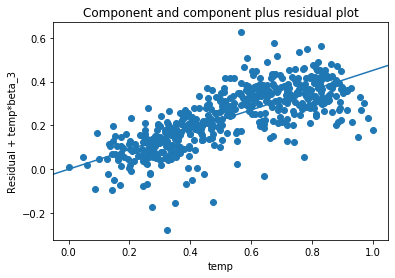

In [226]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

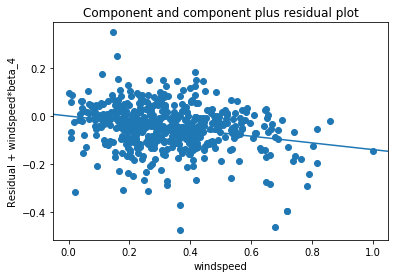

In [227]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

#### The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

### Homoscedasticity

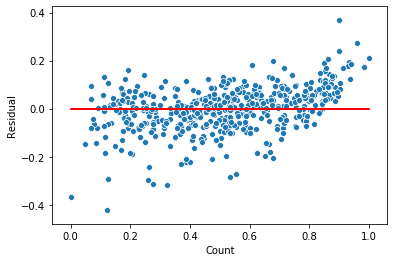

In [228]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### There is no visible pattern in residual values, hence homoscedacity is well preserved

### Absence of Multicolinearity

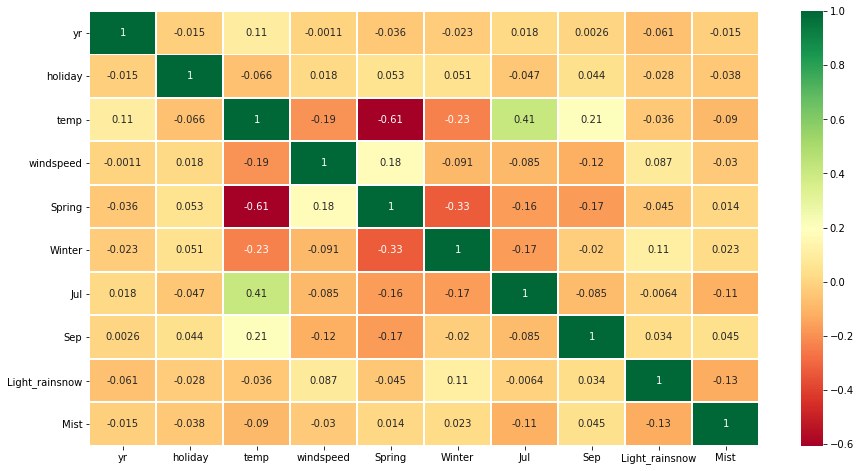

In [231]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [232]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,Spring,1.65
9,Mist,1.51
5,Winter,1.40
6,Jul,1.35
7,Sep,1.20
8,Light_rainsnow,1.08
1,holiday,1.04


#### As VIF valus is lees than 5, ther will be low multicolinearity also we can see it in heatmap

###  Independence of residuals

In [234]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0024


#### which means there is almost no auto correlation

#### Also there is normality of errors